<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
url='/content/drive/MyDrive/air122.csv'
dataset = pd.read_csv(url)
print(dataset)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [3]:
dataset.drop('Month', inplace=True, axis=1)
print(dataset)

     Passengers
0           112
1           118
2           132
3           129
4           121
..          ...
139         606
140         508
141         461
142         390
143         432

[144 rows x 1 columns]


In [4]:
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM,Dense, Dropout, Activation, Flatten,Embedding,Input
from keras import losses
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Bidirectional, GRU, RepeatVector,  TimeDistributed,BatchNormalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
X=dataset[:-1]
Y=dataset[1:]



In [23]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 100, test size: 44 


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [26]:

X_train=np.array(X_train).reshape(X_train.shape[0],1,1)
testX = np.reshape(X_test, (X_test.shape[0],1, 1))

In [28]:
model = Sequential()
model.add(LSTM(2,input_shape=(1,1)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(X_train,Y_train,epochs=100,batch_size=1)
accr = model.evaluate(X,Y)
print('Test set\n loss: {:0.3f}\n mae:{:0.3f}'.format(accr[0], accr[1]))

Epoch 1/100
95/95 [==============================] - 3s 3ms/step - loss: 0.0755 - mae: 0.2315
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0708 - mae: 0.2258
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0667 - mae: 0.2206
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0631 - mae: 0.2151
Epoch 5/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0600 - mae: 0.2101
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0569 - mae: 0.2044
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0540 - mae: 0.1990
Epoch 8/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0512 - mae: 0.1933
Epoch 9/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1881
Epoch 10/100
95/95 [==============================] - 0s 2ms/step - loss: 0.0457 - mae: 0.1824
Epoch 11/100
95/95 [==============================] - 0s 2m

In [29]:
from sklearn.metrics import explained_variance_score

Pred = model.predict(testX)
print(explained_variance_score(Y_test, Pred))

2/2 [==============================] - 0s 7ms/step
0.9397836776250764


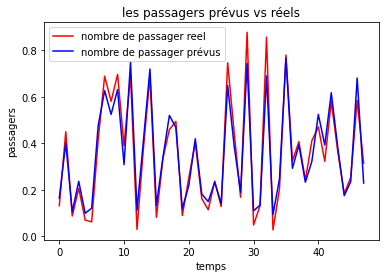

In [30]:
from matplotlib import pyplot as plt
plt.plot(Y_test,color='red',label='nombre de passager reel')
plt.plot(Pred,color='blue',label='nombre de passager prévus')
plt.title('les passagers prévus vs réels')
plt.xlabel('temps')
plt.ylabel('passagers')
plt.legend()
plt.show()